In [98]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score
%matplotlib inline
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.utils import shuffle
from sklearn.model_selection import  GridSearchCV

import sys
import time
import warnings
import os

In [2]:
df = pd.read_csv('snails.csv')

In [3]:
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.tail()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4175 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 497.8 KB


In [6]:
avgHeight = df["height"].mean()

In [7]:
avgHeight

0.1395832335329331

In [8]:
df["height"].fillna(avgHeight,inplace=True)

In [9]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 497.8 KB


In [10]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139583,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041715,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [11]:
profile = ProfileReport(df, title="Snails Profiling Report")

In [12]:
# profile

In [13]:
df['sex'] = df['sex'].astype('category')

In [14]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   sex             4177 non-null   category
 1   length          4177 non-null   float64 
 2   diameter        4177 non-null   float64 
 3   height          4177 non-null   float64 
 4   whole_weight    4177 non-null   float64 
 5   shucked_weight  4177 non-null   float64 
 6   viscera_weight  4177 non-null   float64 
 7   shell_weight    4177 non-null   float64 
 8   rings           4177 non-null   int64   
dtypes: category(1), float64(7), int64(1)
memory usage: 265.5 KB


In [15]:
df['sex'].value_counts()

M    1528
I    1342
F    1307
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

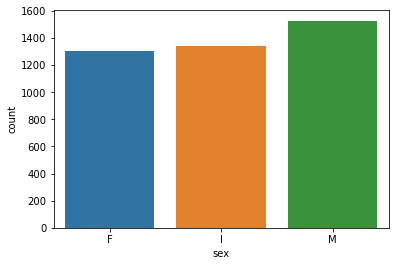

In [16]:
sns.countplot(x = 'sex', data = df)

In [17]:
df_sex_ohe = pd.get_dummies(df['sex'], prefix_sep = "sex_", dummy_na = False)

In [18]:
df_sex_ohe

,F,I,M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
4172,1,0,0
4173,0,0,1
4174,0,0,1
4175,1,0,0


In [19]:
df = pd.concat([df, df_sex_ohe], axis = 1)

In [20]:
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,F,I,M
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [21]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   sex             4177 non-null   category
 1   length          4177 non-null   float64 
 2   diameter        4177 non-null   float64 
 3   height          4177 non-null   float64 
 4   whole_weight    4177 non-null   float64 
 5   shucked_weight  4177 non-null   float64 
 6   viscera_weight  4177 non-null   float64 
 7   shell_weight    4177 non-null   float64 
 8   rings           4177 non-null   int64   
 9   F               4177 non-null   uint8   
 10  I               4177 non-null   uint8   
 11  M               4177 non-null   uint8   
dtypes: category(1), float64(7), int64(1), uint8(3)
memory usage: 277.8 KB


In [22]:
df.drop('sex', inplace=True, axis=1)

In [23]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   length          4177 non-null   float64
 1   diameter        4177 non-null   float64
 2   height          4177 non-null   float64
 3   whole_weight    4177 non-null   float64
 4   shucked_weight  4177 non-null   float64
 5   viscera_weight  4177 non-null   float64
 6   shell_weight    4177 non-null   float64
 7   rings           4177 non-null   int64  
 8   F               4177 non-null   uint8  
 9   I               4177 non-null   uint8  
 10  M               4177 non-null   uint8  
dtypes: float64(7), int64(1), uint8(3)
memory usage: 273.4 KB


In [24]:
df.rename(columns={'F': 'sex_F', 'I': 'sex_I', 'M': 'sex_M'}, inplace=True)

In [25]:
df.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


<AxesSubplot:xlabel='rings', ylabel='count'>

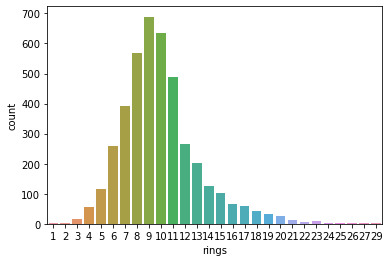

In [26]:
sns.countplot(x = 'rings', data = df)

In [27]:
df['age'] = df['rings']+1.5

In [28]:
df.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_F,sex_I,sex_M,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0,8.5


In [29]:
df.drop('rings', axis = 1, inplace = True)

In [30]:
df.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,sex_F,sex_I,sex_M,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0,8.5


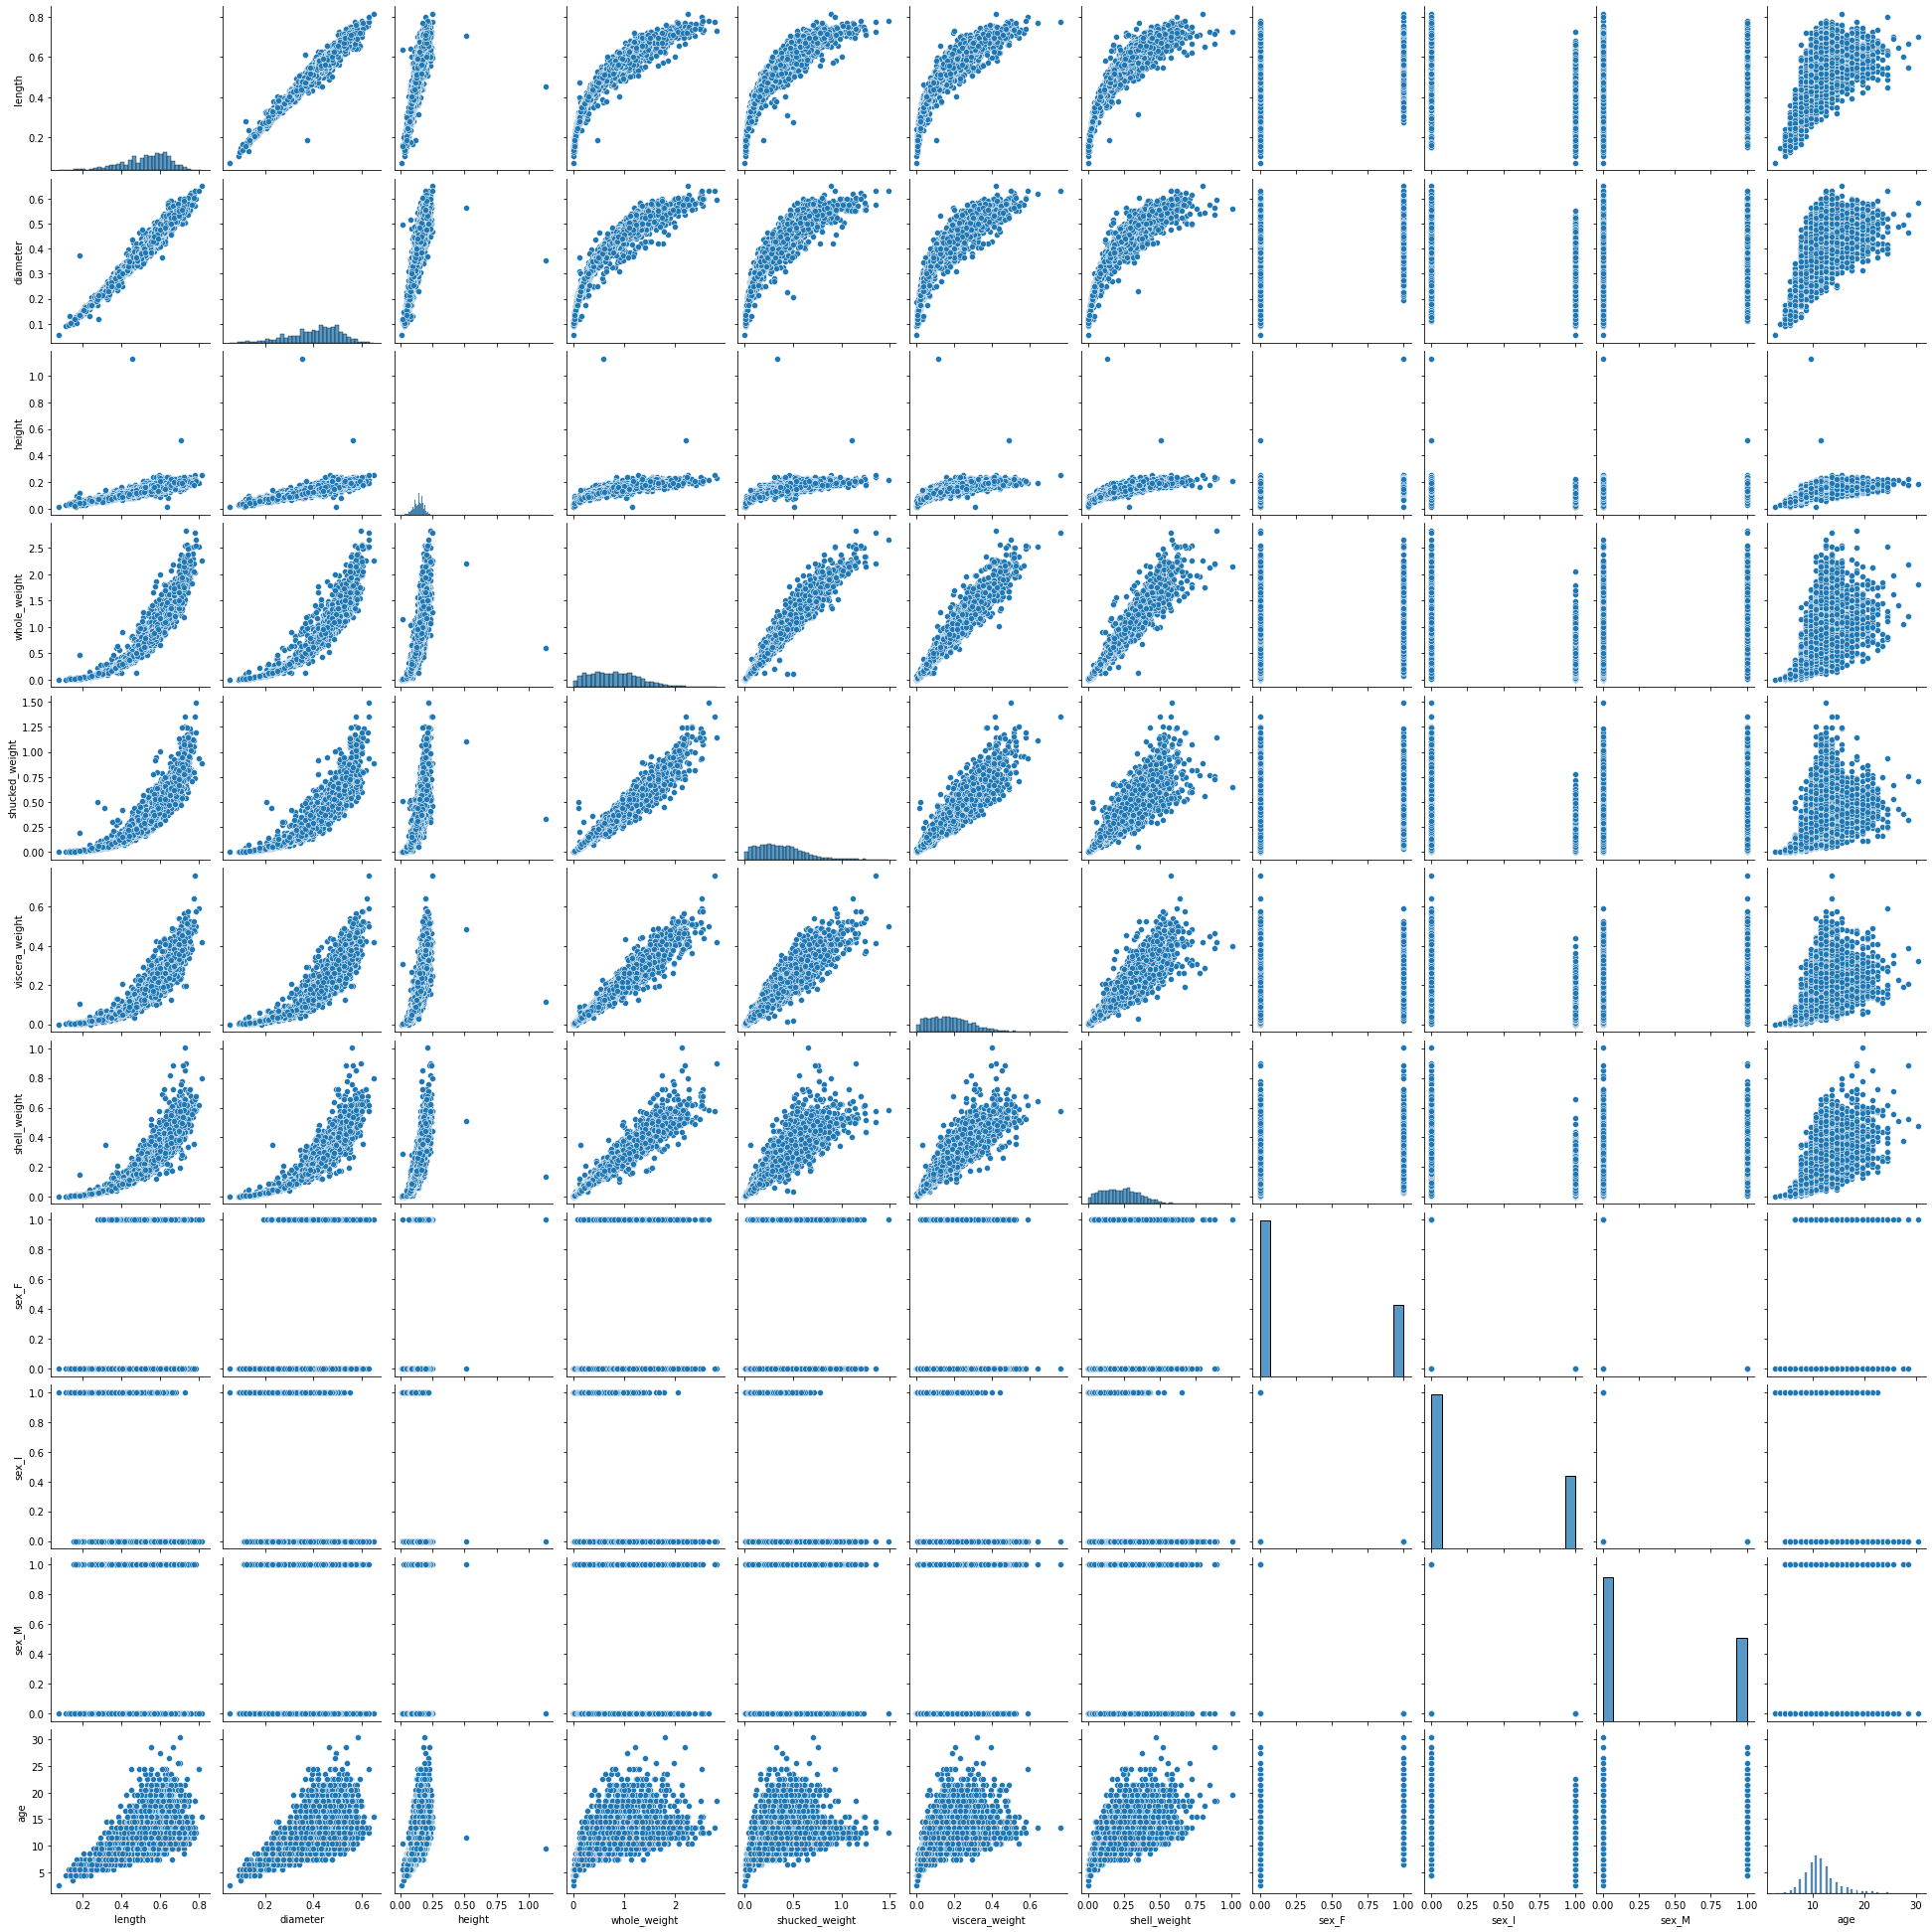

In [31]:
_=sns.pairplot(df)

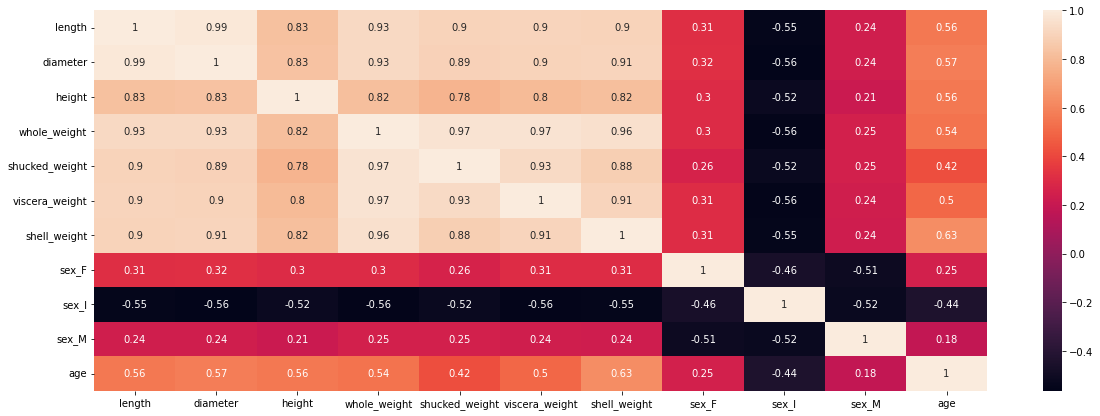

In [32]:
plt.figure(figsize=(20,7))
_=sns.heatmap(df.corr(), annot=True)

In [33]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   length          4177 non-null   float64
 1   diameter        4177 non-null   float64
 2   height          4177 non-null   float64
 3   whole_weight    4177 non-null   float64
 4   shucked_weight  4177 non-null   float64
 5   viscera_weight  4177 non-null   float64
 6   shell_weight    4177 non-null   float64
 7   sex_F           4177 non-null   uint8  
 8   sex_I           4177 non-null   uint8  
 9   sex_M           4177 non-null   uint8  
 10  age             4177 non-null   float64
dtypes: float64(8), uint8(3)
memory usage: 273.4 KB


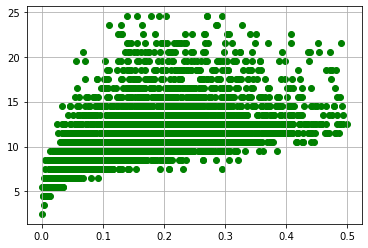

In [169]:
var = 'viscera_weight'
plt.scatter(x = df[var], y = df['age'],c='green')
plt.grid(True)

In [166]:
df.drop(df[(df['viscera_weight']> 0.5) & (df['age'] < 25)].index, inplace=True)
df.drop(df[(df['viscera_weight']<0.5) & (df['age'] > 25)].index, inplace=True)

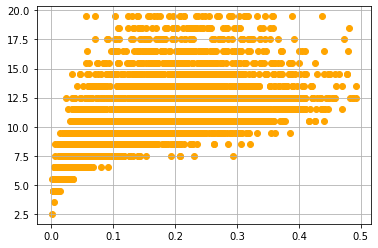

In [182]:
var = 'viscera_weight'
plt.scatter(x = df[var], y = df['age'],c='orange')
plt.grid(True)

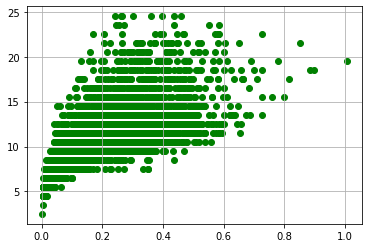

In [171]:
var = 'shell_weight'
plt.scatter(x = df[var], y = df['age'],c='green')
plt.grid(True)

In [173]:
df.drop(df[(df['shell_weight']> 0.6) & (df['age'] < 25)].index, inplace=True)
df.drop(df[(df['shell_weight']<0.8) & (df['age'] > 25)].index, inplace=True)

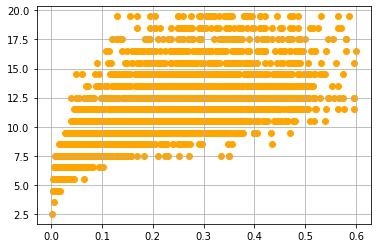

In [181]:
var = 'shell_weight'
plt.scatter(x = df[var], y = df['age'],c='orange')
plt.grid(True)

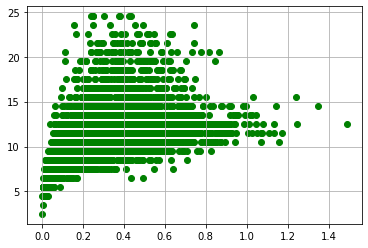

In [175]:
var = 'shucked_weight'
plt.scatter(x = df[var], y = df['age'],c='green')
plt.grid(True)

In [177]:
df.drop(df[(df['shucked_weight']>= 1) & (df['age'] < 20)].index, inplace=True)
df.drop(df[(df['shucked_weight']<1) & (df['age'] > 20)].index, inplace=True)

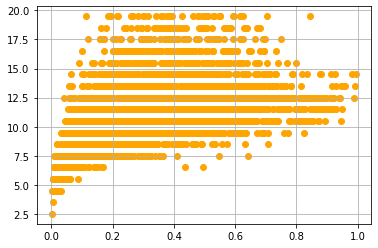

In [180]:
var = 'shucked_weight'
plt.scatter(x = df[var], y = df['age'],c='orange')
plt.grid(True)

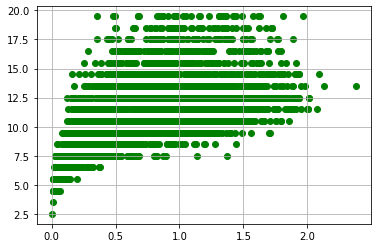

In [183]:
var = 'whole_weight'
plt.scatter(x = df[var], y = df['age'],c='green')
plt.grid(True)

In [187]:
df.drop(df[(df['whole_weight']>= 2.3) & (df['age'] < 25)].index, inplace=True)
df.drop(df[(df['whole_weight']<2.5) & (df['age'] > 25)].index, inplace=True)

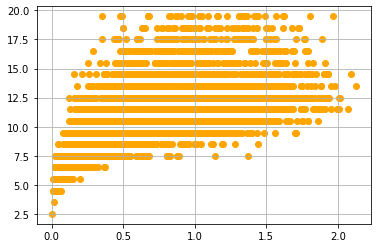

In [188]:
var = 'whole_weight'
plt.scatter(x = df[var], y = df['age'],c='orange')
plt.grid(True)

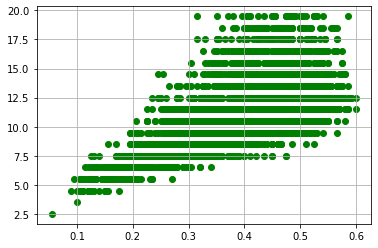

In [189]:
var = 'diameter'
plt.scatter(x = df[var], y = df['age'],c='green')
plt.grid(True)

In [191]:
df.drop(df[(df['diameter']<0.1) & (df['age'] < 5)].index, inplace=True)
df.drop(df[(df['diameter']<0.6) & (df['age'] > 25)].index, inplace=True)
df.drop(df[(df['diameter']>=0.6) & (df['age']< 25)].index, inplace=True)

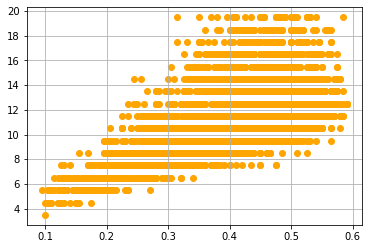

In [192]:
var = 'diameter'
plt.scatter(x = df[var], y = df['age'],c='orange')
plt.grid(True)

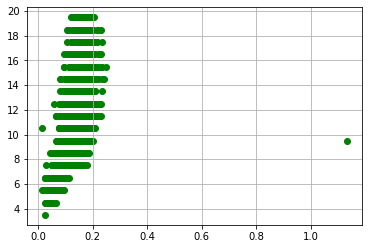

In [193]:
var = 'height'
plt.scatter(x = df[var], y = df['age'],c='green')
plt.grid(True)

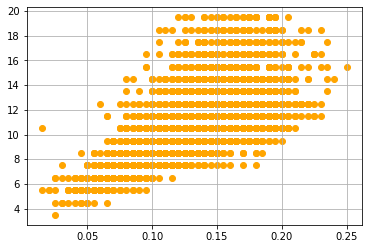

In [195]:
var = 'height'
plt.scatter(x = df[var], y = df['age'],c='orange')
plt.grid(True)

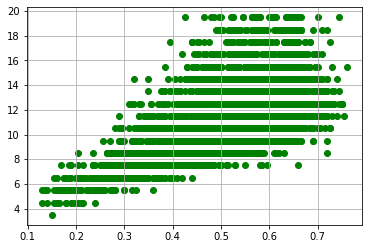

In [197]:
var = 'length'
plt.scatter(x = df[var], y = df['age'],c='green')
plt.grid(True)

In [198]:
df.drop(df[(df['length']<0.1) & (df['age'] < 5)].index, inplace=True)
df.drop(df[(df['length']<0.8) & (df['age'] > 25)].index, inplace=True)
df.drop(df[(df['length']>=0.8) & (df['age']< 25)].index, inplace=True)

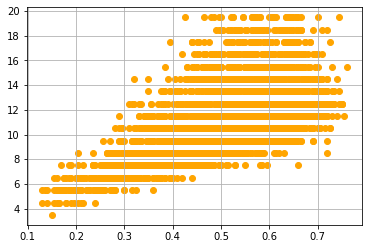

In [199]:
var = 'length'
plt.scatter(x = df[var], y = df['age'],c='orange')
plt.grid(True)

In [194]:
df.drop(df[(df['height']>0.4) & (df['age'] < 15)].index, inplace=True)
df.drop(df[(df['height']<0.4) & (df['age'] > 25)].index, inplace=True)

In [34]:
df.columns

Index(['length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'sex_F', 'sex_I', 'sex_M', 'age'],
      dtype='object')

In [201]:
X = df[['length', 'diameter', 'height', 'whole_weight', 'shucked_weight','viscera_weight', 'shell_weight', 'sex_F', 'sex_I', 'sex_M']]
y = df['age']

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state=1)


In [202]:
lr = LinearRegression(n_jobs=-1)

scores = cross_val_score(lr, X, y, cv=5, scoring='r2')
lr.fit(X, y)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

mse_rl = mean_squared_error(y_test, y_test_pred)
r_rl = r2_score(y_test, y_test_pred)

lr_mse_u = mean_squared_error(y_train, y_train_pred)
lr_mse_t = mean_squared_error(y_test, y_test_pred)

lr_r2_u = r2_score(y_train, y_train_pred)
lr_r2_t = r2_score(y_test, y_test_pred)

lr_mae_u = mean_absolute_error(y_train, y_train_pred)
lr_mae_t = mean_absolute_error(y_test, y_test_pred)


print('MSE na próbkach uczących: %.3f, testowych: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

print('Współczynnik R^2 dla danych uczących: %.3f, testowych: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
print('MAE na próbkach uczących: %.3f, testowych: %.3f' % (
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))

MSE na próbkach uczących: 3.611, testowych: 3.489
Współczynnik R^2 dla danych uczących: 0.539, testowych: 0.505
MAE na próbkach uczących: 1.426, testowych: 1.387


In [73]:
scores

array([-9.79468207, -2.98794725, -5.81739729, -3.79003634, -3.99243154])

In [37]:
lr.intercept_

11.433684462532918

In [38]:
lr.coef_

array([-0.05368331,  1.10268082,  0.44462624,  4.43084565, -4.40415121,
       -1.16408375,  1.2016823 ,  0.11640728, -0.26895637,  0.14869315])

In [206]:
ridge = Ridge(alpha=1, random_state=10, solver='svd')
scores = cross_val_score(ridge, X, y, cv=5, scoring='r2')
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
## Fit() vs predict() - 
## https://stackoverflow.com/questions/45704226/what-does-the-fit-method-in-scikit-learn-do

ridge_mse_u = mean_squared_error(y_train, y_train_pred)
ridge_mse_t = mean_squared_error(y_test, y_test_pred)

ridge_r2_u = r2_score(y_train, y_train_pred)
ridge_r2_t = r2_score(y_test, y_test_pred)


print('MSE na próbkach uczących: %.3f, testowych: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

print('Współczynnik R^2 dla danych uczących: %.3f, testowych: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE na próbkach uczących: 3.608, testowych: 3.498
Współczynnik R^2 dla danych uczących: 0.540, testowych: 0.504


In [102]:
scores

array([-9.77226281, -2.99449148, -5.81837734, -3.78114691, -4.01224814])

In [204]:
param  = {'alpha':[0.01, 0.1, 1,10,100],
         'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
gridge = GridSearchCV(estimator = Ridge(random_state=10,),
param_grid = param,scoring= 'r2' ,cv = 5,  n_jobs = -1)
gridge.fit(X_train, y_train)
gridge.best_params_, gridge.best_score_

({'alpha': 1, 'solver': 'svd'}, 0.5319376132983404)

In [209]:
kn = KNeighborsRegressor(n_neighbors=15, leaf_size=10, algorithm='brute', weights='uniform')
scores = cross_val_score(kn, X, y, cv=5, scoring='neg_mean_squared_error')
kn.fit(X_train, y_train)
y_train_pred = kn.predict(X_train)
y_test_pred = kn.predict(X_test)
## Fit() vs predict() - 
## https://stackoverflow.com/questions/45704226/what-does-the-fit-method-in-scikit-learn-do

kn_mse_u = mean_squared_error(y_train, y_train_pred)
kn_mse_t = mean_squared_error(y_test, y_test_pred)

kn_r2_u = r2_score(y_train, y_train_pred)
kn_r2_t = r2_score(y_test, y_test_pred)

print('MSE na próbkach uczących: %.3f, testowych: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

print('Współczynnik R^2 dla danych uczących: %.3f, testowych: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE na próbkach uczących: 3.243, testowych: 3.602
Współczynnik R^2 dla danych uczących: 0.586, testowych: 0.489


In [75]:
scores

array([-11.69157895,  -2.70626794,  -5.92819162,  -4.04550898,
        -4.03861078])

In [207]:
param  = {'n_neighbors':[3, 5, 10, 15, 20],
         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
          'weights' : ['uniform', 'distance'],
         'leaf_size' : [10, 20, 30, 40, 50]}
gkn = GridSearchCV(estimator = KNeighborsRegressor(),
param_grid = param,scoring= 'neg_mean_squared_error' ,cv = 5,  n_jobs = -1)
gkn.fit(X_train, y_train)
gkn.best_params_, gkn.best_score_

({'algorithm': 'brute',
  'leaf_size': 10,
  'n_neighbors': 15,
  'weights': 'distance'},
 -3.7460759742536056)

In [211]:
rf = RandomForestRegressor(criterion='squared_error', n_estimators=90, max_features='auto', max_depth=8) #criterion='poisson', criterion='absolute_error', max_depth=10, max_features : {"auto", "sqrt", "log2"}
scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
## Fit() vs predict() - 
## https://stackoverflow.com/questions/45704226/what-does-the-fit-method-in-scikit-learn-do

rf_mse_u = mean_squared_error(y_train, y_train_pred)
rf_mse_t = mean_squared_error(y_test, y_test_pred)

rf_r2_u = r2_score(y_train, y_train_pred)
rf_r2_t = r2_score(y_test, y_test_pred)

print('MSE na próbkach uczących: %.3f, testowych: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

print('Współczynnik R^2 dla danych uczących: %.3f, testowych: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE na próbkach uczących: 1.807, testowych: 3.430
Współczynnik R^2 dla danych uczących: 0.770, testowych: 0.514


In [210]:
param  = {'n_estimators' : [10 ,20, 30, 40, 50, 60, 70, 80, 90, 100],
         'max_features' : ['auto', 'sqrt', 'log2'],
         'max_depth' : [3, 5, 8, 10, 15, 20, 30],
         'criterion' : ["squared_error", "absolute_error", "poisson"]}
grf = GridSearchCV(estimator = RandomForestRegressor(random_state=42,),
param_grid = param,scoring= 'r2' ,cv = 5,  n_jobs = -1)
grf.fit(X_train, y_train)
grf.best_params_, grf.best_score_

({'criterion': 'squared_error',
  'max_depth': 8,
  'max_features': 'auto',
  'n_estimators': 90},
 0.5594910831438168)

In [61]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [88]:
scores

array([-10.03731876,  -2.63692852,  -5.36318446,  -3.40686104,
        -3.55799529])

In [226]:
gb = GradientBoostingRegressor(loss='squared_error',learning_rate=0.2, criterion='squared_error', max_depth=3, max_features='auto')
scores = cross_val_score(gb, X, y, cv=5, scoring='r2')
gb.fit(X_train, y_train)
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)
## Fit() vs predict() - 
## https://stackoverflow.com/questions/45704226/what-does-the-fit-method-in-scikit-learn-do

gb_mse_u = mean_squared_error(y_train, y_train_pred)
gb_mse_t = mean_squared_error(y_test, y_test_pred)

gb_r2_u = r2_score(y_train, y_train_pred)
gb_r2_t = r2_score(y_test, y_test_pred)


print('MSE na próbkach uczących: %.3f, testowych: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

print('Współczynnik R^2 dla danych uczących: %.3f, testowych: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE na próbkach uczących: 2.126, testowych: 3.551
Współczynnik R^2 dla danych uczących: 0.729, testowych: 0.497


In [77]:
scores

array([-9.7685427 , -2.58620545, -5.33045966, -3.40431413, -3.6398044 ])

In [225]:
param  = {'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
         'max_features' : ['auto', 'sqrt', 'log2'],
         'max_depth' : [3, 5, 8, 10, 15, 20, 30],
         'criterion' : ['friedman_mse', 'squared_error', 'mse', 'mae']}
ggb = GridSearchCV(estimator = GradientBoostingRegressor(random_state=42,),
param_grid = param,scoring= 'r2' ,cv = 5,  n_jobs = -1)
ggb.fit(X_train, y_train)
ggb.best_params_, ggb.best_score_

({'criterion': 'squared_error',
  'loss': 'squared_error',
  'max_depth': 3,
  'max_features': 'auto'},
 0.5500123530357902)

In [214]:
svr = SVR(kernel='rbf', C=4.0, epsilon=0.4)
scores = cross_val_score(svr, X, y, cv=5, scoring='r2')
svr.fit(X_train, y_train)
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)
## Fit() vs predict() - 
## https://stackoverflow.com/questions/45704226/what-does-the-fit-method-in-scikit-learn-do

svr_mse_u = mean_squared_error(y_train, y_train_pred)
svr_mse_t = mean_squared_error(y_test, y_test_pred)

svr_r2_u = r2_score(y_train, y_train_pred)
svr_r2_t = r2_score(y_test, y_test_pred)


print('MSE na próbkach uczących: %.3f, testowych: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

print('Współczynnik R^2 dla danych uczących: %.3f, testowych: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE na próbkach uczących: 3.238, testowych: 3.352
Współczynnik R^2 dla danych uczących: 0.587, testowych: 0.525


In [79]:
scores

array([-11.43606675,  -1.84150315,  -5.73414612,  -3.29906062,
        -3.33904024])

In [213]:
param  = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
         'gamma' : ['scale', 'auto'],
         'C': [1.0, 2.0, 3.0, 4.0],
         'epsilon' : [0.1, 0.2, 0.3, 0.4, 0.5]}
gsvr = GridSearchCV(estimator = SVR(),
param_grid = param,scoring= 'r2' ,cv = 5,  n_jobs = -1)
gsvr.fit(X_train, y_train)
gsvr.best_params_, gsvr.best_score_

({'C': 4.0, 'epsilon': 0.4, 'gamma': 'scale', 'kernel': 'rbf'},
 0.5524034327479941)

In [217]:
lasso = Lasso(alpha=0.5, fit_intercept=True)
scores = cross_val_score(lasso, X, y, cv=5, scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
## Fit() vs predict() - 
## https://stackoverflow.com/questions/45704226/what-does-the-fit-method-in-scikit-learn-do

lasso_mse_u = mean_squared_error(y_train, y_train_pred)
lasso_mse_t = mean_squared_error(y_test, y_test_pred)

lasso_r2_u = r2_score(y_train, y_train_pred)
lasso_r2_t = r2_score(y_test, y_test_pred)

print('MSE na próbkach uczących: %.3f, testowych: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

print('Współczynnik R^2 dla danych uczących: %.3f, testowych: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE na próbkach uczących: 4.828, testowych: 4.538
Współczynnik R^2 dla danych uczących: 0.384, testowych: 0.357


In [133]:
scores

array([-14.85399023,  -3.81006715,  -7.39556833,  -4.64253008,
        -4.91711508])

In [216]:
param  = {'alpha' : [0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0],
         'fit_intercept' : ['True', 'False'],
         'max_iter' : [1000, 2000, 3000]}
glasso = GridSearchCV(estimator = Lasso(random_state=42,),
param_grid = param,scoring= 'neg_mean_squared_error' ,cv = 5,  n_jobs = -1)
glasso.fit(X_train, y_train)
glasso.best_params_, glasso.best_score_

({'alpha': 0.5, 'fit_intercept': 'True', 'max_iter': 1000}, -4.845836824752249)

In [219]:
elanet = ElasticNet(alpha=0.0, l1_ratio=0.1, max_iter=500) #2 hiperparametry alpha do l2 i ratio do lasso
scores = cross_val_score(elanet, X, y, cv=5, scoring='r2')
elanet.fit(X_train, y_train)
y_train_pred = elanet.predict(X_train)
y_test_pred = elanet.predict(X_test)
## Fit() vs predict() - 
## https://stackoverflow.com/questions/45704226/what-does-the-fit-method-in-scikit-learn-do

elanet_mse_u = mean_squared_error(y_train, y_train_pred)
elanet_mse_t = mean_squared_error(y_test, y_test_pred)

elanet_r2_u = r2_score(y_train, y_train_pred)
elanet_r2_t = r2_score(y_test, y_test_pred)

print('MSE na próbkach uczących: %.3f, testowych: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

print('Współczynnik R^2 dla danych uczących: %.3f, testowych: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE na próbkach uczących: 3.608, testowych: 3.497
Współczynnik R^2 dla danych uczących: 0.540, testowych: 0.504


C:\Users\l\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\l\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\l\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.828e+03, tolerance: 2.077e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet

In [83]:
scores

array([-15.64488603,  -4.0335921 ,  -8.00052842,  -4.97313782,
        -4.93771943])

In [220]:
param  = {'alpha' : [0.0, 1.0, 2.0, 3.0],
         'l1_ratio' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
         'fit_intercept' : ['True', 'False'],
         'max_iter' : [500, 1000, 1500, 2000]}
gelanet = GridSearchCV(estimator = ElasticNet(random_state=42,),
param_grid = param,scoring= 'neg_mean_squared_error' ,cv = 5,  n_jobs = -1)
gelanet.fit(X_train, y_train)
gelanet.best_params_, gelanet.best_score_

C:\Users\l\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\l\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\l\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.322e+03, tolerance: 1.879e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coor

({'alpha': 0.0, 'fit_intercept': 'True', 'l1_ratio': 0.1, 'max_iter': 500},
 -3.652480147908915)

In [222]:
dt = DecisionTreeRegressor(criterion='squared_error',max_depth=5, max_features='auto', min_samples_leaf=1, min_samples_split=6, min_weight_fraction_leaf=0.0, splitter='best')
scores = cross_val_score(dt, X, y, cv=5, scoring='r2')
dt.fit(X_train, y_train)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
## Fit() vs predict() - 
## https://stackoverflow.com/questions/45704226/what-does-the-fit-method-in-scikit-learn-do

dt_mse_u = mean_squared_error(y_train, y_train_pred)
dt_mse_t = mean_squared_error(y_test, y_test_pred)

dt_r2_u = r2_score(y_train, y_train_pred)
dt_r2_t = r2_score(y_test, y_test_pred)

print('MSE na próbkach uczących: %.3f, testowych: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

print('Współczynnik R^2 dla danych uczących: %.3f, testowych: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE na próbkach uczących: 3.388, testowych: 3.956
Współczynnik R^2 dla danych uczących: 0.568, testowych: 0.439


In [85]:
scores

array([-14.94856459,  -6.50119617,  -9.89101796,  -8.07305389,
        -7.46826347])

In [221]:
param  = {'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
         'splitter' : ['best', 'random'],
         'max_depth' : [3, 5, 8, 10, None],
         'min_samples_split' : [2, 3, 4, 5, 6],
         'min_samples_leaf' : [1, 2, 3, 4, 5],
         'min_weight_fraction_leaf' : [0.0, 0.1, 0.2],
         'max_features' : ['auto', 'sqrt', 'log2']}
gdt = GridSearchCV(estimator = DecisionTreeRegressor(random_state=42,),
param_grid = param,scoring= 'r2' ,cv = 5,  n_jobs = -1)
gdt.fit(X_train, y_train)
gdt.best_params_, gdt.best_score_

({'criterion': 'squared_error',
  'max_depth': 5,
  'max_features': 'auto',
  'min_samples_leaf': 1,
  'min_samples_split': 6,
  'min_weight_fraction_leaf': 0.0,
  'splitter': 'best'},
 0.4974126587667108)

In [223]:
>>> d = {
...     'MSE/R^2': ['MSE_u', 'MSE_t', 'R^2_u','R^2_t'],
...     'Regresja Liniowa': [lr_mse_u, lr_mse_t, lr_r2_u, lr_r2_t],
...     'Regresja Grzbietowa': [ridge_mse_u, ridge_mse_t, ridge_r2_u, ridge_r2_t],
        'Regresja KNieghbors': [kn_mse_u, kn_mse_t, kn_r2_u, kn_r2_t],
        'Regresja RandomForrest': [rf_mse_u, rf_mse_t, rf_r2_u, rf_r2_t],
        'Regresja GradientBoosting': [gb_mse_u, gb_mse_t, gb_r2_u, gb_r2_t],
        'Regresja SVR': [svr_mse_u, svr_mse_t, svr_r2_u, svr_r2_t],
...     'Regresja Lasso': [lasso_mse_u, lasso_mse_t, lasso_r2_u, lasso_r2_t],
...     'Regresja Elastycznej Siatki': [elanet_mse_u, elanet_mse_t, elanet_r2_u, elanet_r2_t],
        'Drzewo Decyzyjne': [dt_mse_u, dt_mse_t, dt_r2_u, dt_r2_t]
... }
>>> df_zest = pd.DataFrame(data=d)
>>> df_zest

,MSE/R^2,Regresja Liniowa,Regresja Grzbietowa,Regresja KNieghbors,Regresja RandomForrest,Regresja GradientBoosting,Regresja SVR,Regresja Lasso,Regresja Elastycznej Siatki,Drzewo Decyzyjne
0,MSE_u,3.610888,3.608262,3.243254,1.806543,2.286098,3.238470,4.828273,3.607921,3.388203
1,MSE_t,3.489494,3.498302,3.602253,3.429735,3.490323,3.352491,4.538163,3.496523,3.956415
2,R^2_u,0.539441,0.539776,0.586332,0.769580,0.708414,0.586942,0.384167,0.539819,0.567844
3,R^2_t,0.505284,0.504035,0.489297,0.513756,0.505166,0.524707,0.356610,0.504287,0.439087


In [224]:
df_zest.transpose()

,0,1,2,3
MSE/R^2,MSE_u,MSE_t,R^2_u,R^2_t
Regresja Liniowa,3.610888,3.489494,0.539441,0.505284
Regresja Grzbietowa,3.608262,3.498302,0.539776,0.504035
Regresja KNieghbors,3.243254,3.602253,0.586332,0.489297
Regresja RandomForrest,1.806543,3.429735,0.76958,0.513756
Regresja GradientBoosting,2.286098,3.490323,0.708414,0.505166
Regresja SVR,3.23847,3.352491,0.586942,0.524707
Regresja Lasso,4.828273,4.538163,0.384167,0.35661
Regresja Elastycznej Siatki,3.607921,3.496523,0.539819,0.504287
Drzewo Decyzyjne,3.388203,3.956415,0.567844,0.439087
